In [12]:
import requests
from tkinter import *
from PIL import Image
from PIL import ImageTk
from datetime import datetime
from threading import Timer
import time
import getpass
import os
import cv2
import webbrowser
import os
import urllib
import pafy
import youtube_dl
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
from tkinter import Tk, Message, Button, Menu
from tkinter.messagebox import showinfo
import tkinter as tk
from IPython.display import YouTubeVideo

In [13]:
def getJSONbyFile(img_filename):
    subscription_key = "00ef32b871f54d30a3064d6782658152"
    face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'
    
    headers = {
    'Content-type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key }

    params = {
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'emotion',
    }
    with open(img_filename, 'rb') as f:
        img_data = f.read()

    response = requests.post(face_api_url, params=params, headers=headers, data=img_data)
    faces = response.json()
    print(faces)
    return faces
    

In [14]:
def egtEmotionArrayByJson(faces):
    emotions=[]
    for face in faces:
        emotions.append(face['faceAttributes']['emotion'])
    return emotions

In [15]:
def detectExpression(fileName):
    return egtEmotionArrayByJson(getJSONbyFile(fileName))

In [17]:
def getVideoByEmotions(emotions):
    anger     = emotions[0]['anger']
    contempt  = emotions[0]['contempt']
    disgust    = emotions[0]['disgust']
    fear      = emotions[0]['fear']
    happiness = emotions[0]['happiness']
    neutral   = emotions[0]['neutral']
    sadness   = emotions[0]['sadness']
    suprise   = emotions[0]['surprise']
    
    
    objects = ('Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', 'Suprise')
    y_pos = np.arange(len(objects))
    performance = [anger,disgust,fear,happiness,neutral,sadness,suprise]
 
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Emotions')
    plt.title('Sentiment Analysis of Facial Expression')
    plt.figure(figsize=(25, 25))
    plt.show()
    
    averageEmotions = (anger + contempt + disgust + fear + happiness + neutral + sadness + suprise) / 8
    
    if anger > averageEmotions:
            return "ZbZSe6N_BXs"
    
    elif contempt > averageEmotions:
            return "OlcmlO9GguM"
                            
    elif disgust > averageEmotions:
            return "OlcmlO9GguM"
                
    elif fear > averageEmotions:
            return "HnrogLw6SOQ"
                            
    elif happiness > averageEmotions:
            return "zcruIov45bI"
            
    elif neutral > averageEmotions:
            return "CyTTIpidQ-k"
                            
    elif sadness > averageEmotions:
            return "o_D11Kt8bo4"
                            
    elif suprise > averageEmotions:
            return "CyTTIpidQ-k"


In [19]:
def main():
    path="."
    img_name="Image.jpg"
    root = Tk()
    root.title("Sentimental Analysis")
    #logo pending
    root.wm_state('zoomed')

    msg = Message(root, text='Hello everyone, Welcome!')
    msg.config(font=('calibri', 26, 'italic bold'))
    msg.pack()

    w0 = tk.Label(root,text=" ")
    w0.pack()
    w = tk.Label(root, text="View the most recent image taken!")
    w.config(font=('calibri', 16, 'italic bold'))
    w.pack()

    def openimage():
        recentimage = cv2.imread('./Image.jpg')
        cv2.imshow('Recent Image',recentimage)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


    b=tk.Button(root,text="Click Here",command = openimage)
    b.pack()

    def executeCameraScript():
        #Code for the camera script to trigger
        
        
        messagebox.showinfo("Information","Press Space key to capture the image and Esc key to exit camera")
        cam = cv2.VideoCapture(0)
        cv2.namedWindow("WebCam")

        while True:
            ret, frame = cam.read()
            cv2.imshow("WebCam",frame)

            if not ret:
                break

            k=cv2.waitKey(1)        

            if k%256 == 27:
            # ESC pressed
                print("Escape hit, closing...")
                break
            elif k%256 == 32:
            # SPACE pressed               
                cv2.imwrite(os.path.join(".","Image.jpg"), frame)
                print("New Image written!")
                cv2.waitKey(1000)
                break


        cam.release()
        cv2.destroyAllWindows()
        return;

    menubar = Menu(root)
    menubar.add_command(label="Open Camera", command=executeCameraScript)
    menubar.add_command(label="Close Main Window", command=root.destroy)
    root.config(menu=menubar)

    root.mainloop()
    
    
    emotions = detectExpression(path+"\\"+img_name)
    video = getVideoByEmotions(emotions)
    return video

New Image written!
[{'faceId': '33a84c5a-1c26-42a7-a0ab-e34f9b2b7933', 'faceRectangle': {'top': 105, 'left': 254, 'width': 146, 'height': 146}, 'faceAttributes': {'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.998, 'neutral': 0.002, 'sadness': 0.0, 'surprise': 0.0}}}]


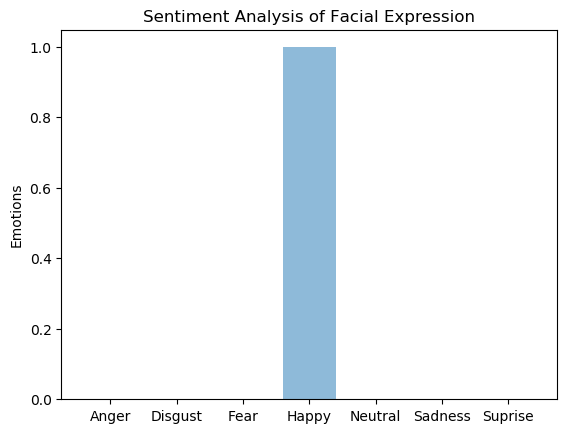

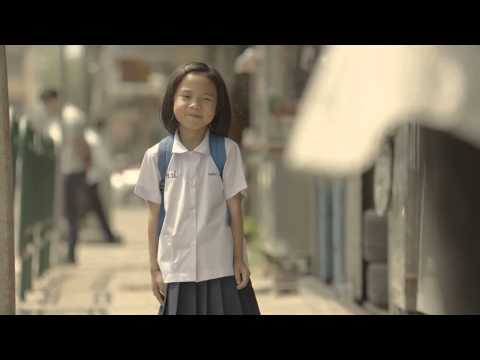

In [21]:
YouTubeVideo(main())